<a href="https://colab.research.google.com/github/nlahri/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install piml > /dev/


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 13.5 MB

In [1]:
import pandas as pd
from piml import Experiment
from piml.models import XGB2Classifier

exp = Experiment()
data = pd.read_csv('https://github.com/shrutibalan4591/South-German-Credit-Risk-Classification/raw/main/Data/German_credit.csv')

exp.data_loader(data=data)
exp.data_summary(feature_exclude=["amount", "savings", "employment_duration", "personal_status_sex", "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker"], silent=True)
exp.data_prepare(target="credit_risk", task_type="classification", silent=True)

# Train Model without monotonicity
exp.model_train(model=XGB2Classifier(), name='XGB2')

# Train Model with monotonicity constraints on duration
exp.model_train(model=XGB2Classifier(mono_decreasing_list=("duration", )), name="Mono-XGB2")

(CVXPY) Jun 18 01:45:30 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 18 01:45:30 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [14]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

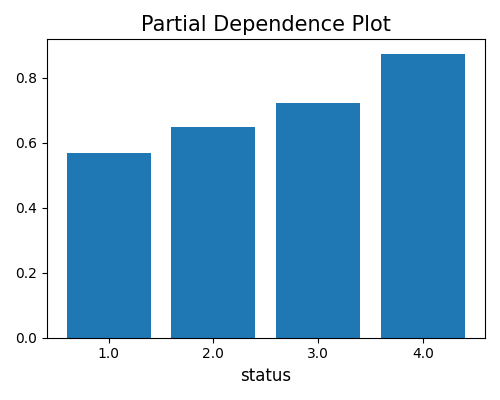

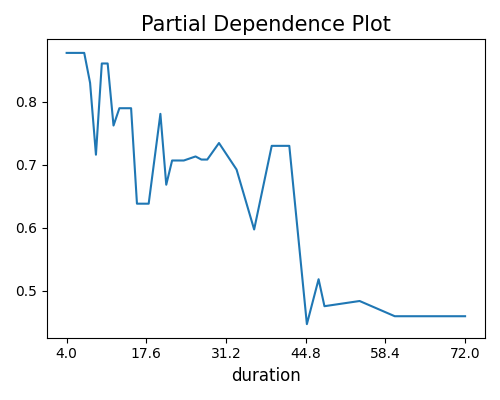

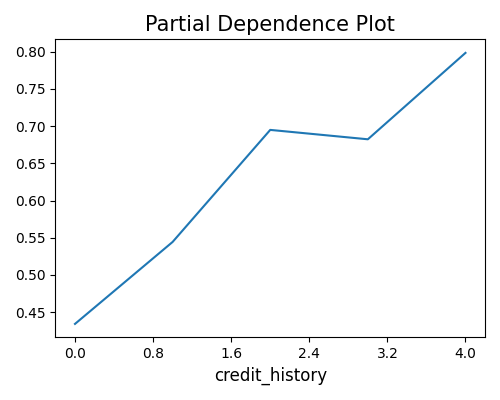

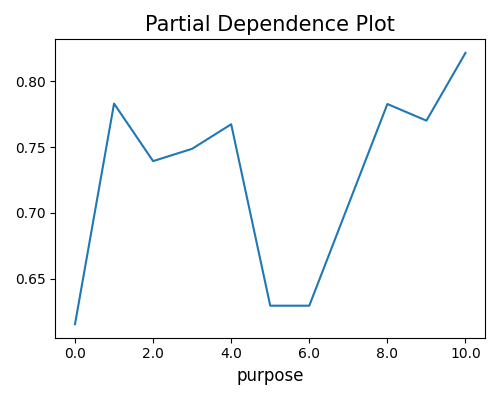

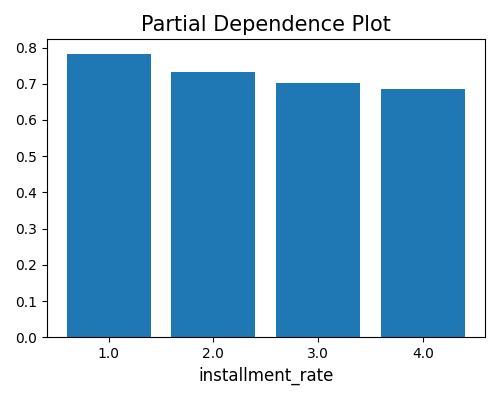

In [9]:
#PDP for Model= XGB2
for col in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    exp.model_explain(model="XGB2", show="pdp", uni_feature=col, use_test=False,
                  grid_size=50, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

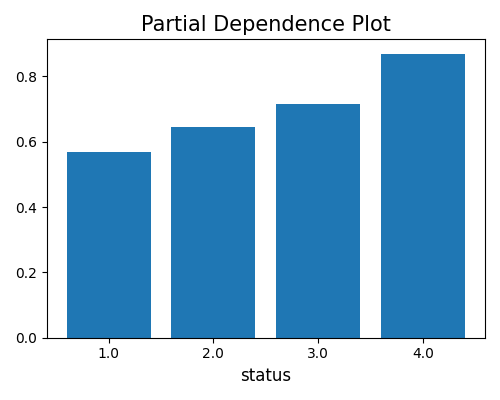

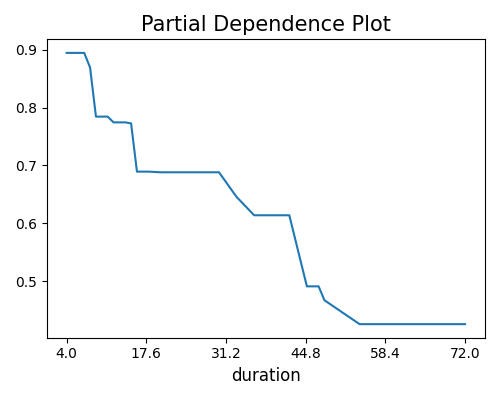

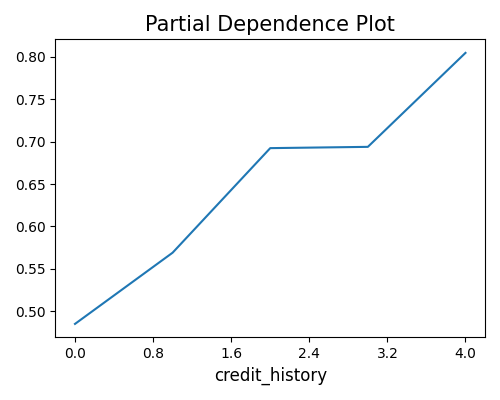

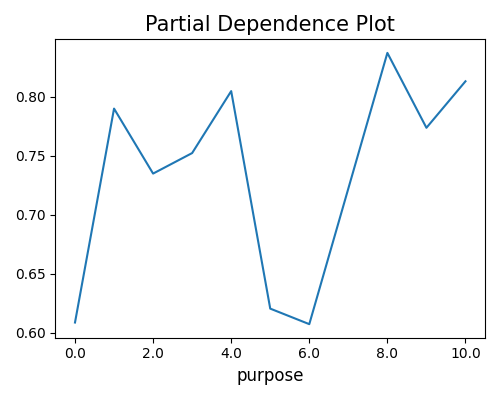

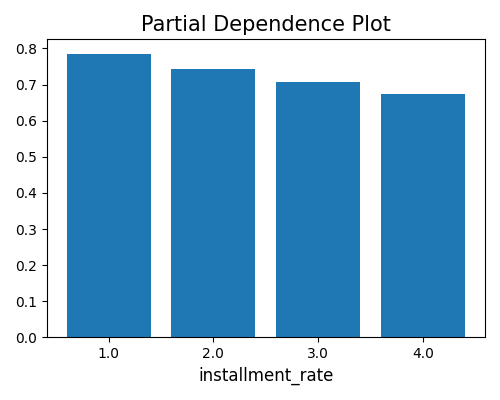

In [10]:
#PDP for Model = Mono-XGB2
for col in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature=col, use_test=False,
                  grid_size=50, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

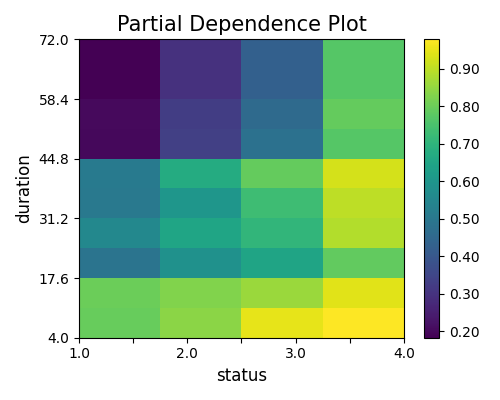

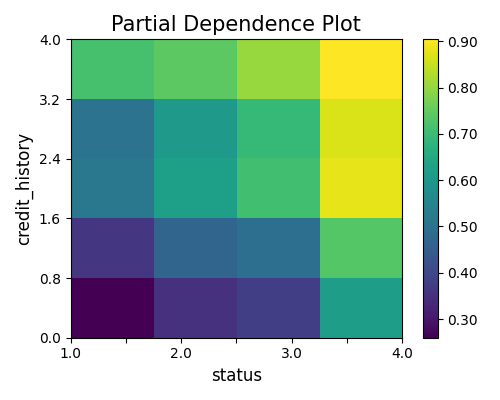

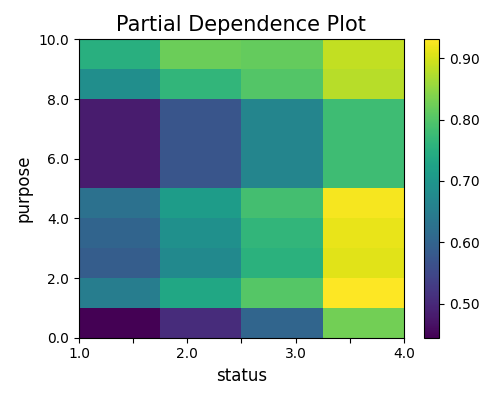

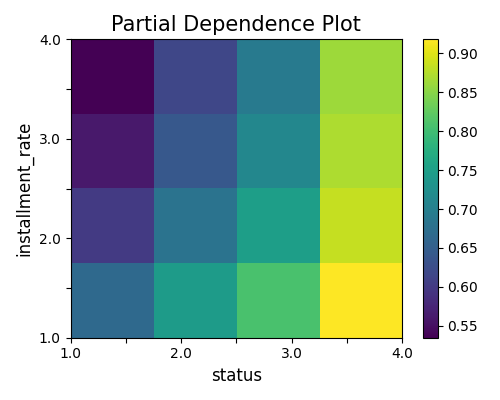

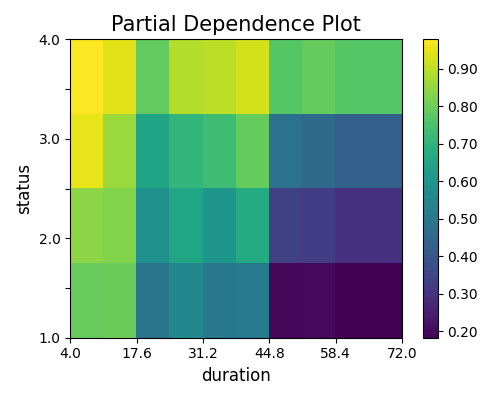

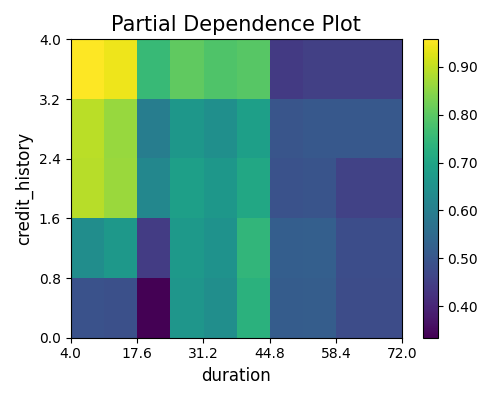

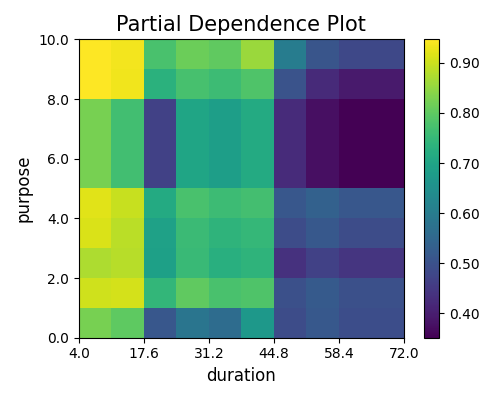

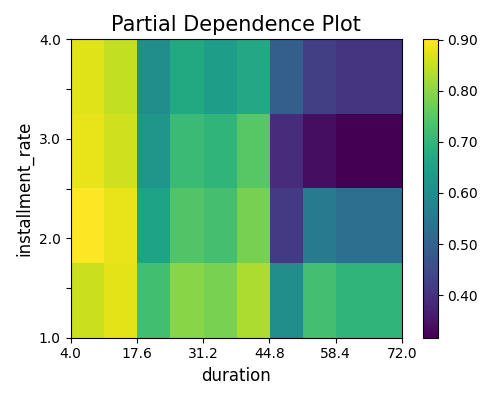

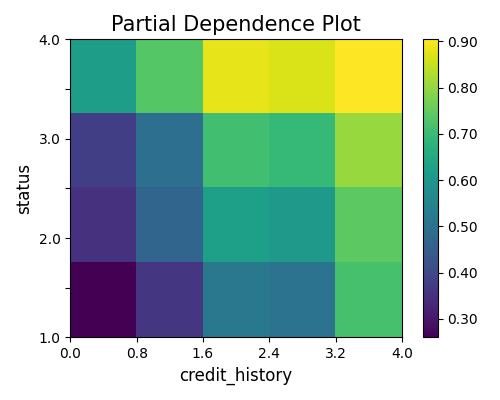

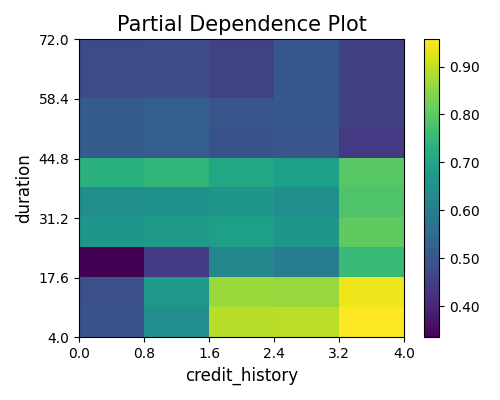

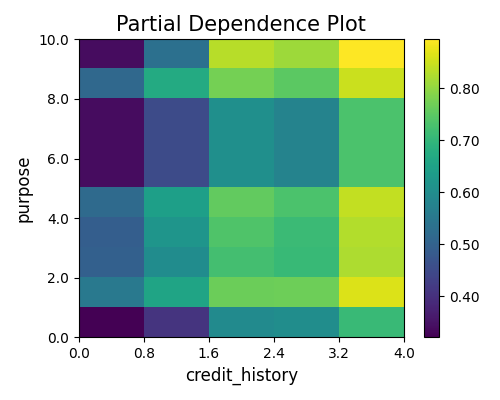

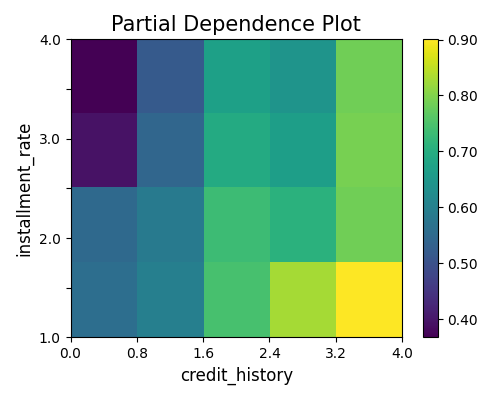

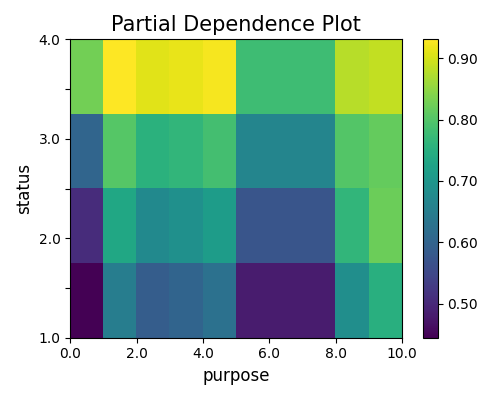

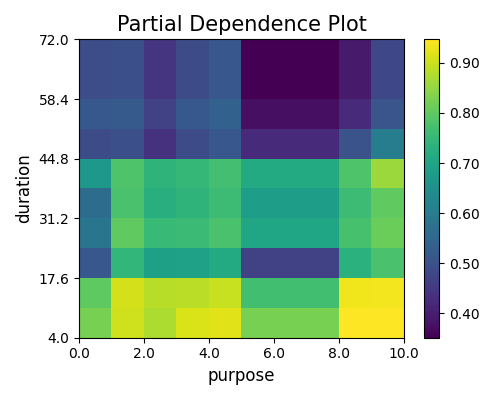

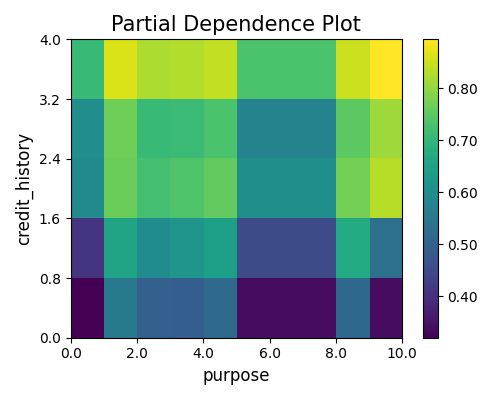

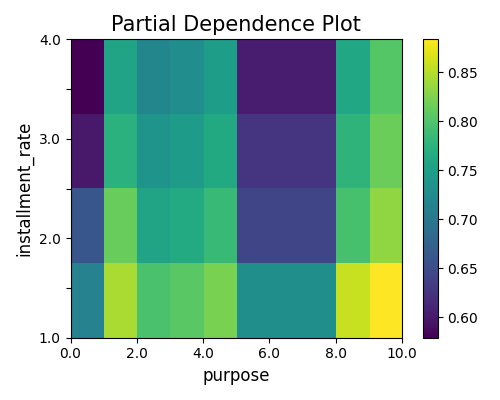

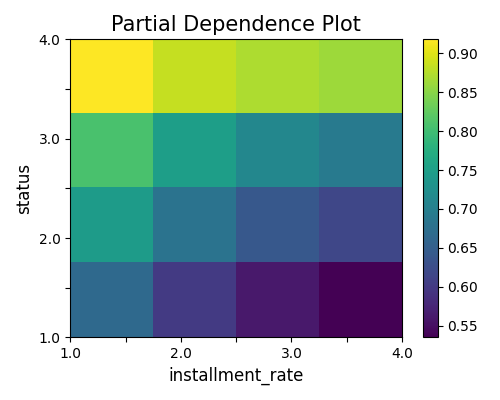

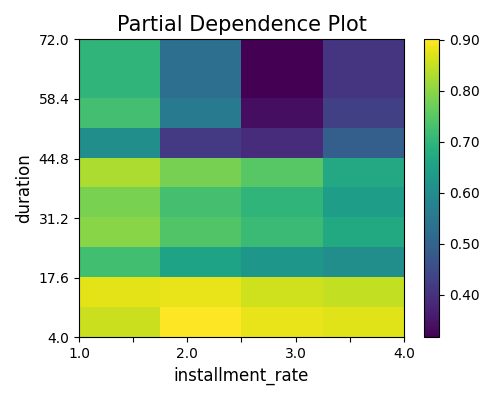

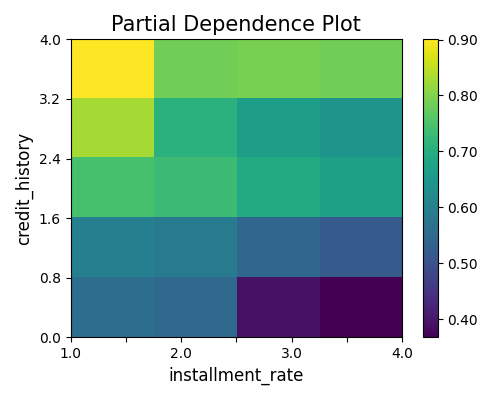

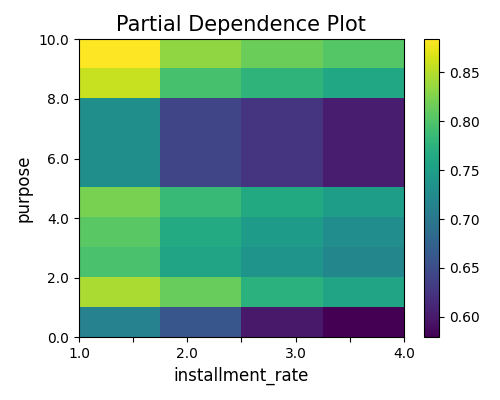

In [12]:
for col1 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
  for col2 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    if col1 != col2:
      exp.model_explain(model="XGB2", show="pdp", bi_features=[col1,col2],
                  grid_size=10, sample_size=10000, sliced_line=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

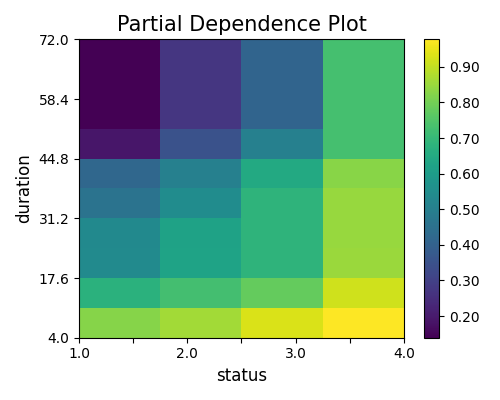

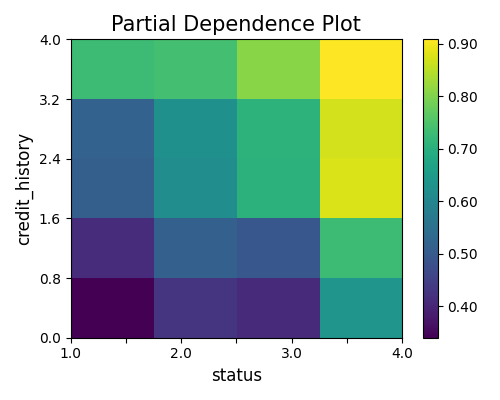

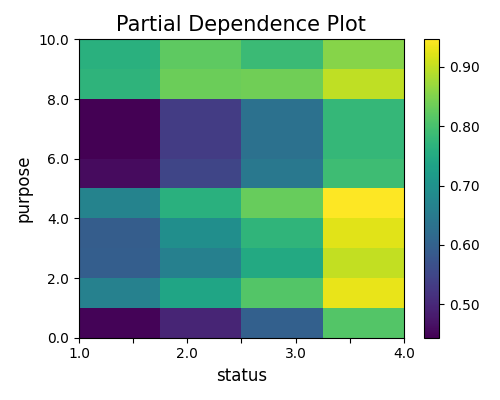

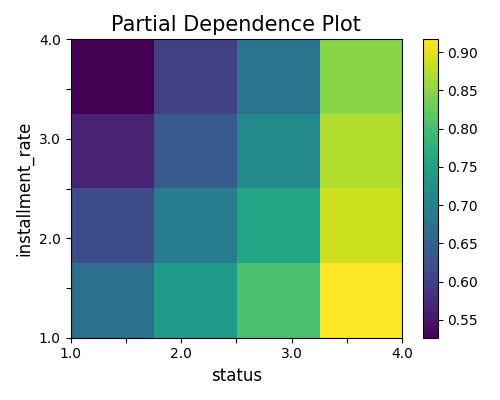

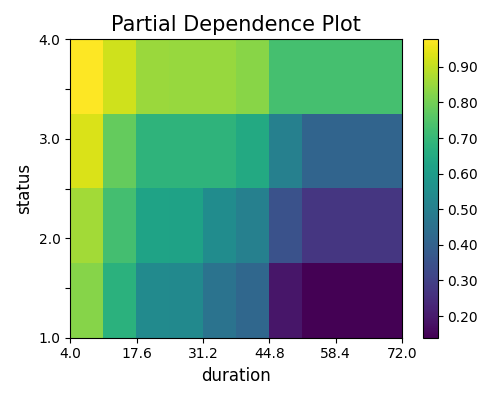

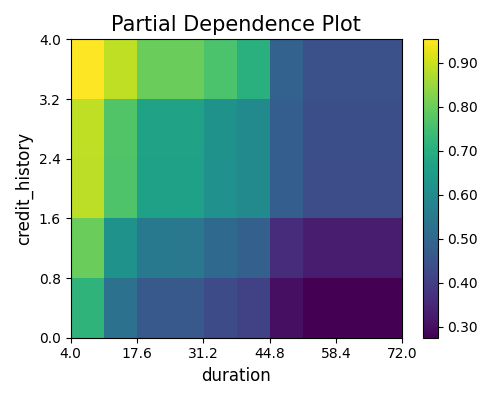

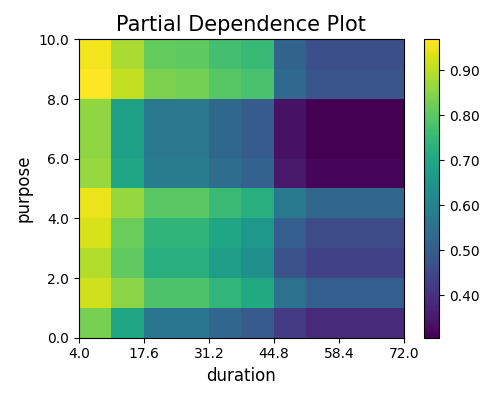

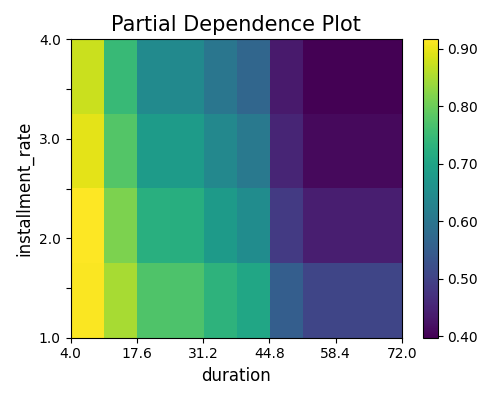

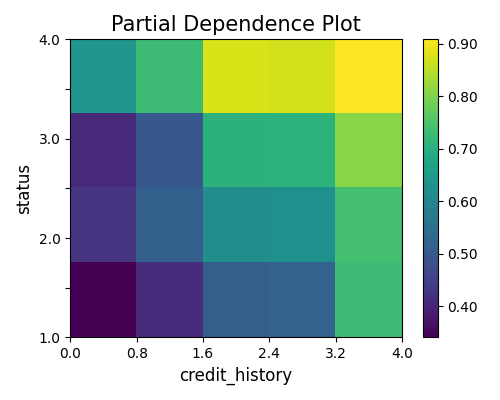

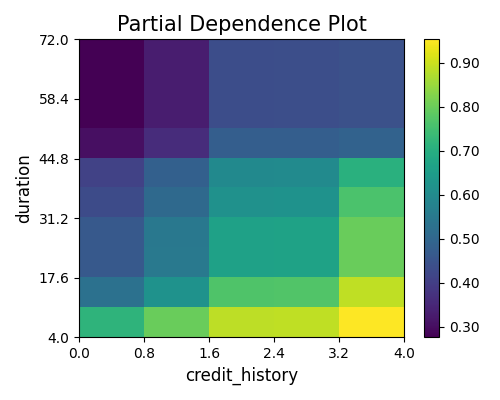

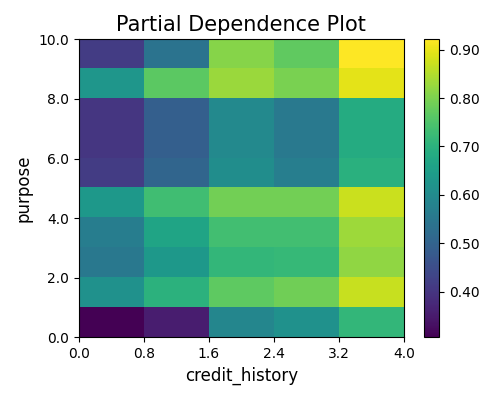

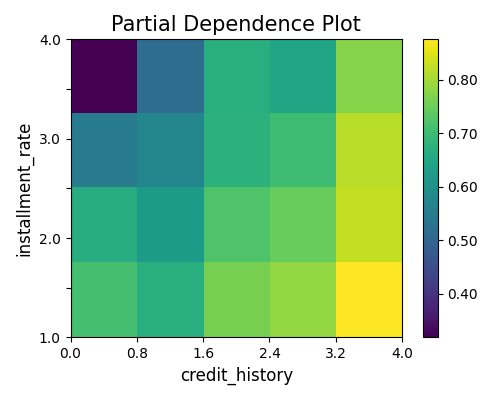

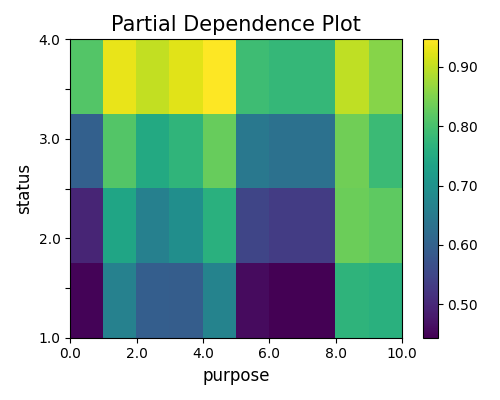

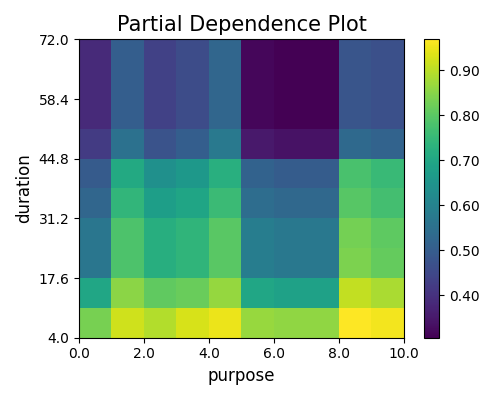

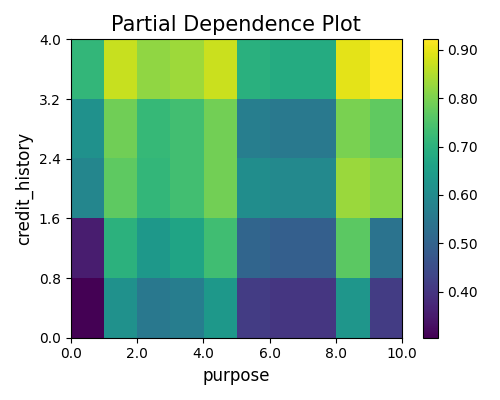

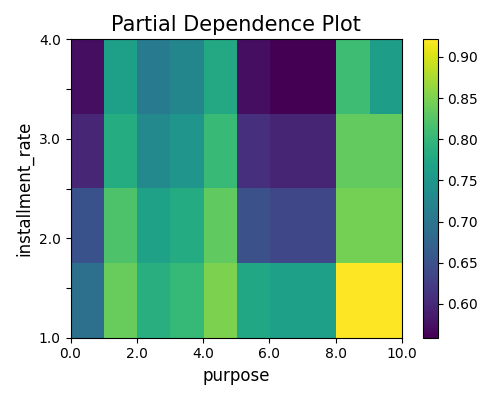

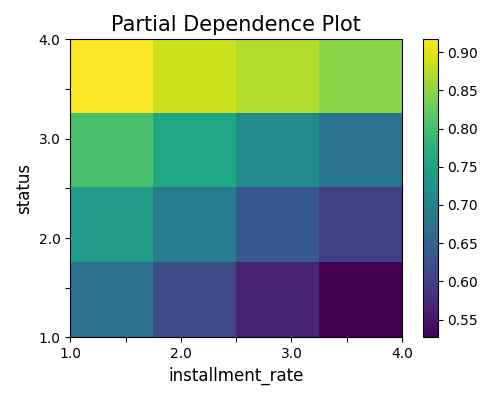

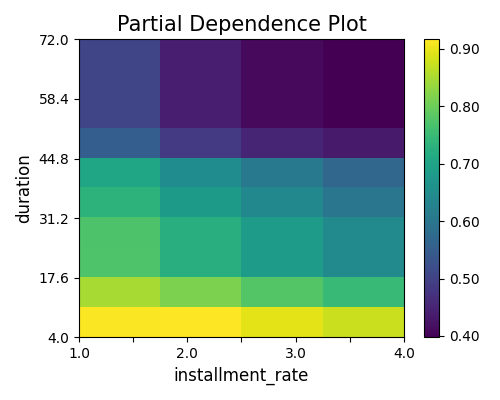

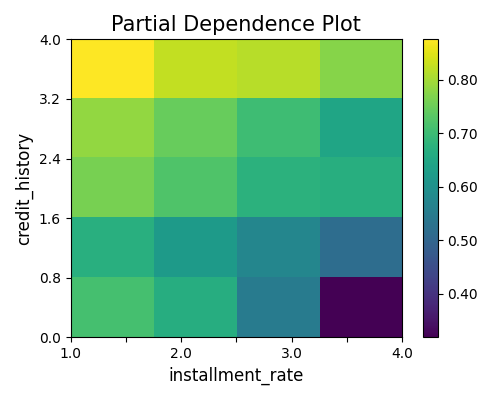

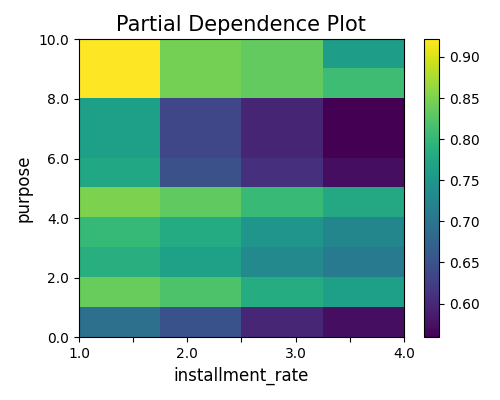

In [13]:
for col1 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
  for col2 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    if col1 != col2:
      exp.model_explain(model="Mono-XGB2", show="pdp", bi_features=[col1,col2],
                  grid_size=10, sample_size=10000, sliced_line=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

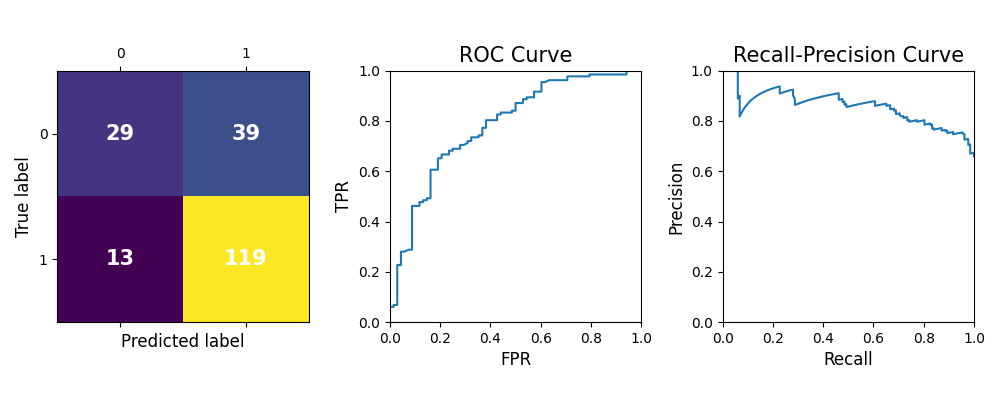

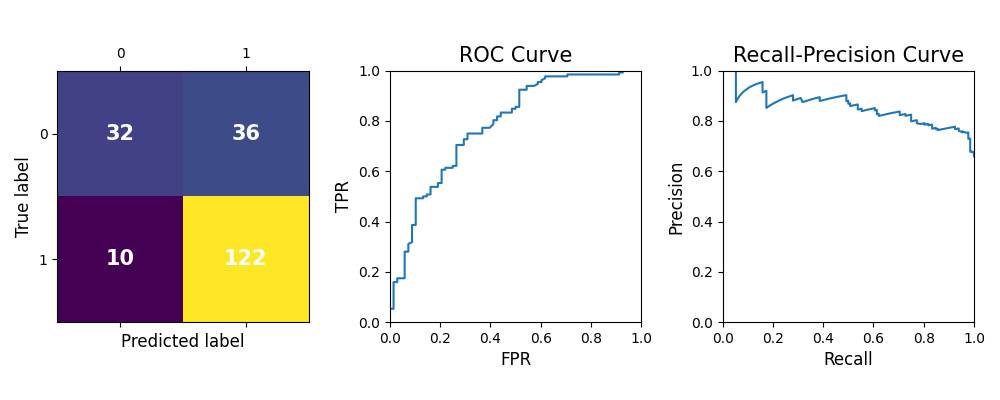

In [16]:
exp.model_diagnose(model="XGB2", show="accuracy_plot", figsize=(10, 4))
exp.model_diagnose(model="Mono-XGB2", show="accuracy_plot", figsize=(10, 4))


In [21]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [20]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…